In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

Let's select two digits that we will be learning to separate, for example 3 and 8.

In [3]:
num1, num2 = 3, 8

Let form the lists of indices i such that the target of i-th object of our training data is either num1 or num2

In [4]:
train_indx = [y == num1 or y == num2 for y in y_train_total]
test_indx = [y == num1 or y == num2 for y in y_test_total]

In [5]:
X_train, y_train = X_train_total[train_indx], y_train_total[train_indx]
X_test, y_test = X_test_total[test_indx], y_test_total[test_indx]

Let us check the sizes of the datasets and the shape of one image.

In [6]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (11982, 28, 28)
y_train:  (11982,)
X_test:  (1984, 28, 28)
y_test:  (1984,)


In [7]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

n_train, n_test

(11982, 1984)

In [8]:
print('Shape of one item: ')
print(X_train[0].shape)

Shape of one item: 
(28, 28)


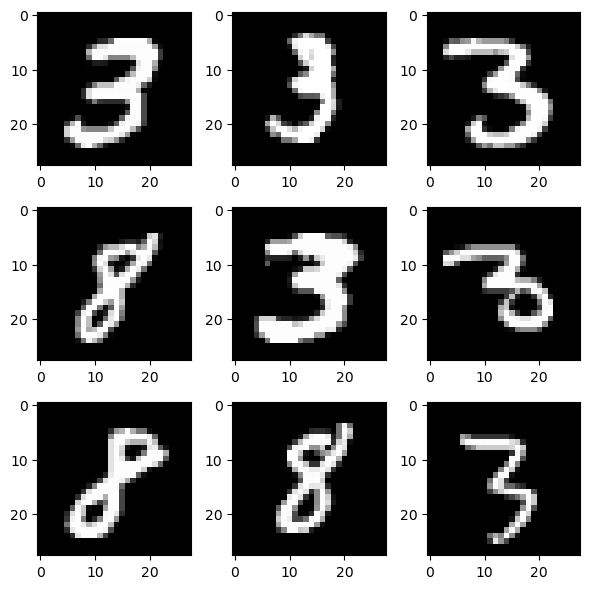

In [9]:
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()
plt.show()

In [10]:
y_train[:9]

array([3, 3, 3, 8, 3, 3, 8, 8, 3], dtype=uint8)

In [11]:
def flatten_image(X):
    return np.concatenate(X)

In [12]:
X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test])
X_test_flat.shape, X_train_flat.shape

((1984, 784), (11982, 784))

In [13]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

In [14]:
X_train_flat.shape

(11982, 784)

In [15]:
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)

In [16]:
X_test_flat = pca.transform(X_test_flat)

In [49]:
X_train_flat.shape, X_test_flat.shape

((11982, 128), (1984, 128))

***It was (1984, 784) and became --> (1984, 128) decreased by 6,125 times***

Now, we use SVM with linear kernel to separate the two classes.

In [18]:
%%time
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train)

CPU times: total: 4.08 s
Wall time: 4.3 s


C:\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

Now, let us make the predictions and calculate the accuracy, that is, the ratio of the true predictions to the test sample size.  

$$accuracy(y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n [y\_true_i=y\_pred_i],$$ where $[a=b]=1$, if $a=b$, and $0$ otherwise.

In [19]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_flat)
acc = accuracy_score(y_test, y_pred)
print("Test accuracy: ", acc)

Test accuracy:  0.9667338709677419


In [20]:
from scipy import misc
from PIL import Image

In [21]:
image = Image.open('photo_2024.jpg').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

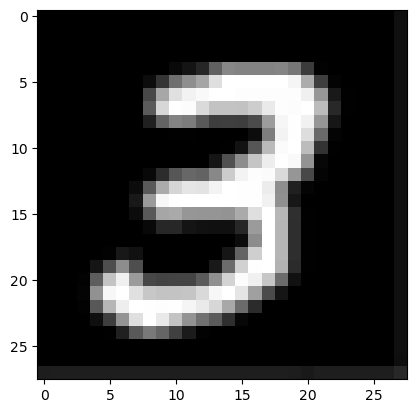

In [22]:
plt.imshow(custom, cmap='gray')
plt.show()

now, lets re-shape image and make a prediction.

In [23]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [24]:
clf.predict(custom)

array([8], dtype=uint8)

Lets repeat the above digit recognition procedure with other 5 hand-written images

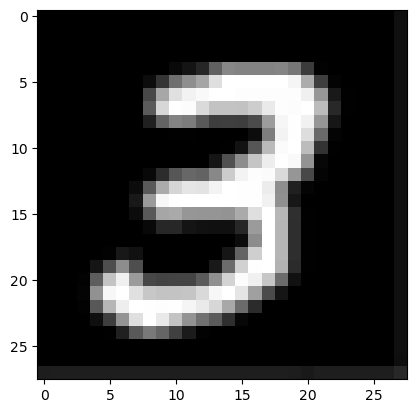

[8]


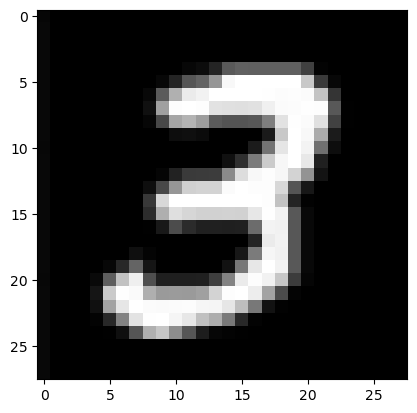

[3]


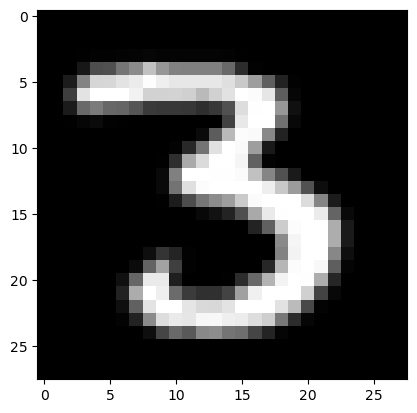

[3]


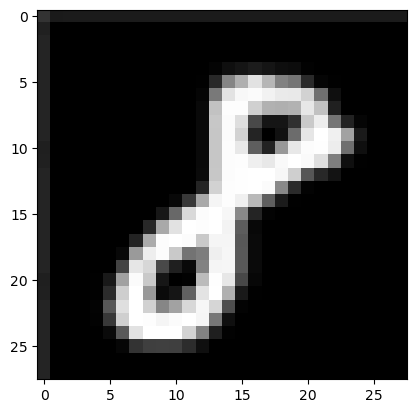

[8]


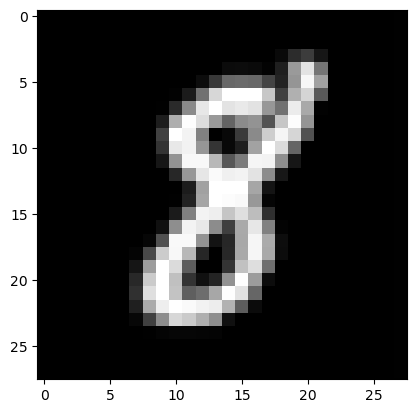

[8]


In [25]:
path = ['photo1.jpg', 'photo2.png', 'photo3.png', 'photo4.png', 'photo5.png']
for i in range(5):
    image = Image.open(path[i]).convert('L')
    new_image = image.resize((28, 28))
    custom = np.array(new_image)
    custom.shape
    
    plt.imshow(custom, cmap='gray')
    plt.show()
    
    custom = flatten_image(custom).reshape(1, -1)
    custom = scaler.transform(custom)
    custom = pca.transform(custom)
    custom.shape
    
    print(clf.predict(custom))

***As you can see, our model guessed 4 out of 5 pictures, which indicates that in general it performs the task. Since our model has an accuracy of 0.9667, this allows us to assume that the first error is the norm and with further comparisons, our accuracy would approach the required value***

#### Now, lets refesher our SVD 

$A = U \Sigma V^T,$ where $U$ and $V$ are orthogonal matrices. 

In [26]:
def getSingularVectorsLeft(matrix, number=10): 
    u, sigma, v = np.linalg.svd(np.transpose(matrix))
    return u[:, :number]

In [27]:
def getSingularImage(X_train, y_train, number):

    indices = np.where(y_train == number)
    selected_images = X_train[indices]

    x = np.array([np.concatenate(img) for img in selected_images])
    left_basis =  getSingularVectorsLeft(x)

    return left_basis

In [28]:
left_basis = getSingularImage(X_train_total, y_train_total, 0)

In [29]:
left_basis.shape

(784, 10)

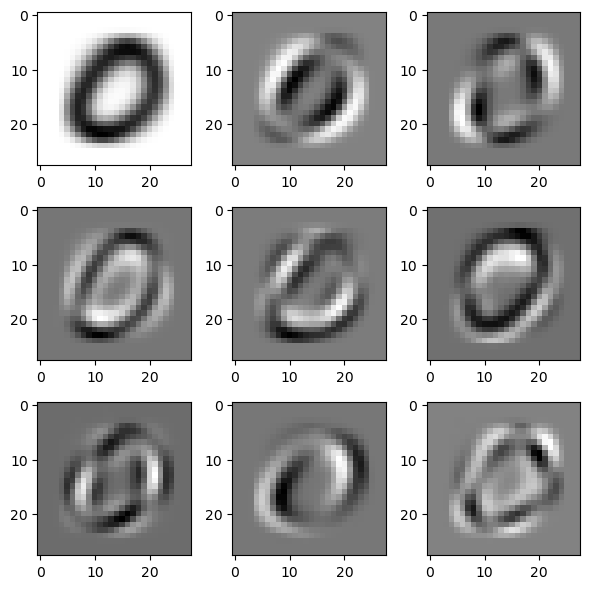

In [30]:
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):
    plt.subplot(b, a, i+1)
    img = np.reshape(left_basis[:, i], (28, 28))
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

Now let's move on and obtain singular images for all numbers.

In [31]:
res = []
for i in range(10):
    x = getSingularImage(X_train_total, y_train_total, i)
    print(f"Processing number: {i}")
    res.append(x)
    
number_basis_matrices = np.array(res)

Processing number: 0
Processing number: 1
Processing number: 2
Processing number: 3
Processing number: 4
Processing number: 5
Processing number: 6
Processing number: 7
Processing number: 8
Processing number: 9


In [32]:
number_basis_matrices.shape

(10, 784, 10)

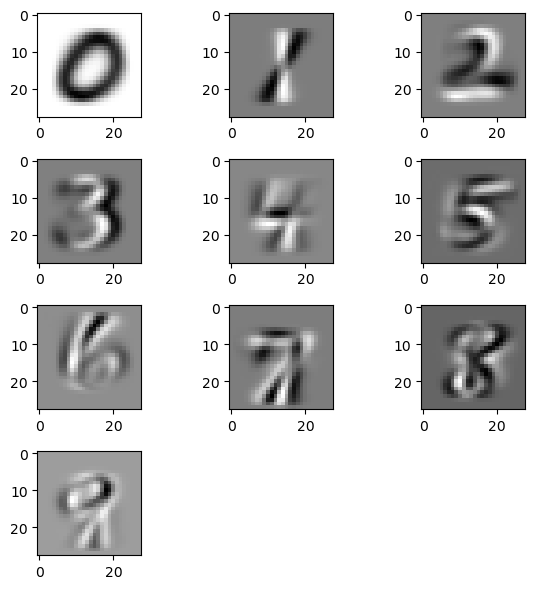

In [33]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):
    plt.subplot(b, a, i+1)
    img = np.reshape(number_basis_matrices[i][:, i], (28, 28))
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [34]:
dim = number_basis_matrices[0].shape[0]
dim

784

Lets calculate the new projection matrix for each $U_k$ to apply later in testing:
$pr = (I - U_k \cdot U_{k}^{T})$. 

In [35]:
numeric_values = [np.identity(len(U.T[0])) - U@U.T for U in number_basis_matrices]

In [36]:
len(numeric_values)

10

In [37]:
numeric_values[0].shape

(784, 784)

In [38]:
def find_closest(test_value, numeric_values):
    stacked_test = test_value.reshape(-1, 1)

    target = min([(np.linalg.norm(val@stacked_test), key) for key, val in enumerate(numeric_values)])
    return target[1]



In [42]:

y_pred = np.array([find_closest(i, numeric_values) for i in X_test_total])

In [43]:
y_pred[0]

7

In [45]:
acc = accuracy_score(y_test_total, y_pred)
acc

0.9485